# Measuring Performance for Classifier Trained on Rocks-Versus-Mines

In [1]:
import random
import pprint

import requests
import numpy as np
import pylab as pl
from sklearn import datasets, linear_model
from sklearn.metrics import roc_curve, auc

In [2]:
def confusion_matrix(predicted, actual, threshold):
    
    if len(predicted) != len(actual):
        return -1
    
    true_positive = 0.0
    false_positive = 0.0
    
    true_negative = 0.0
    false_negative = 0.0
    
    for i in range(len(actual)):
                
        # labels that are 1.0 (positive examples)
        if actual[i] > 0.5:
                                    
            # correctly predicted positive
            if predicted[i] > threshold:
                true_positive += 1.0
                                
            #incorrectly predicted negative
            else:
                false_negative += 1.0
                                
        # labels that are 0.0 (negative examples)
        else:
                                                
            # correctly predicted negative
            if predicted[i] < threshold:
                true_negative += 1.0
                            
            # incorrectly predicted positive
            else:
                false_positive += 1.0
                                                
    results = [true_positive, false_negative, false_positive, true_negative]

    return results
                

In [3]:
data_path = './data/sonar.all-data'

with open(data_path) as data:
    
    x_list = []
    labels = []
    
    for line in data:
        
        # split on comma
        row = line.strip().split(',')
        
        # assign label 1.0 for "M" and 0.0 for "R"
        if row[-1] == 'M':
            labels.append(0.0)
            
        else:
            labels.append(1.0)
            
        # remove label from row
        row.pop()
        
        # convert row to floats
        float_row = [float(num) for num in row]
        
        x_list.append(float_row)


In [4]:
# divide attribute matrix and label vector in to training (2/3 of data) and test sets (1/3 of data)
indices = range(len(x_list))

x_list_test = [x_list[i] for i in indices if i % 3 == 0]
x_list_train = [x_list[i] for i in indices if i % 3 != 0]

labels_test = [labels[i] for i in indices if i % 3 == 0]
labels_train = [labels[i] for i in indices if i % 3 != 0]

# form list of list input into numpy arrays to match input class
x_train = np.array(x_list_train)
y_train = np.array(labels_train)

x_test = np.array(x_list_test)
y_test = np.array(labels_test)

# check shapes
print(f'shape of x_train array: {x_train.shape}')
print(f'shape of y_train array: {y_train.shape}')

print(f'shape of x_test array: {x_test.shape}')
print(f'shape of y_test array: {y_test.shape}')


shape of x_train array: (138, 60)
shape of y_train array: (138,)
shape of x_test array: (70, 60)
shape of y_test array: (70,)


In [5]:
# train linear regression model
rocks_vs_mines_model = linear_model.LinearRegression()
rocks_vs_mines_model.fit(x_train, y_train)

# generate predictions on in-sample error
training_predictions = rocks_vs_mines_model.predict(x_train)

print(f'Some values predicted by model: {training_predictions[0:5]}, {training_predictions[-6:-1]}')


Some values predicted by model: [ 1.10240253  0.57909302  0.61406966  0.63905463  0.68479506], [-0.11094176 -0.12242751  0.22373301 -0.02016858  0.33661919]


In [6]:
# Generate confusion matrix for predictions on training set 
# (in-sample confusion_mat_train = confusion_matrix(training_predictions, y_train, 0.5))
confusion_mat_train =  confusion_matrix(training_predictions, y_train, 0.5)

# pick threshold value and generate confusion matrix entries
true_positive = confusion_mat_train[0]
false_negative = confusion_mat_train[1]

false_positive = confusion_mat_train[2]
true_negative = confusion_mat_train[3]

print(f'True positive: {true_positive} \tFalse negative: {false_negative} \tFalse positive: {false_positive} \tTrue negative: {true_negative}')


True positive: 57.0 	False negative: 7.0 	False positive: 6.0 	True negative: 68.0


In [7]:
# generate predictions on out-of-sample data
test_predictions = rocks_vs_mines_model.predict(x_test)

# generate confusion matrix from predictions on out-of-sample-data
confusion_mat_test = confusion_matrix(test_predictions, y_test, 0.5)

#pick threshold value and generate confusion matrix entries
true_positive = confusion_mat_test[0]
false_negative = confusion_mat_test[1]

false_positive = confusion_mat_test[2]
true_negative = confusion_mat_test[3]

print(f'True positive: {true_positive} \tFalse negative: {false_negative} \tFalse positive: {false_positive} \tTrue negative: {true_negative}')


True positive: 24.0 	False negative: 9.0 	False positive: 9.0 	True negative: 28.0


In [8]:
# Generate ROC curve for in-sample

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, training_predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

print(f'AUC for in-sample ROC curve: {roc_auc}')

AUC for in-sample ROC curve: 0.979518581081081


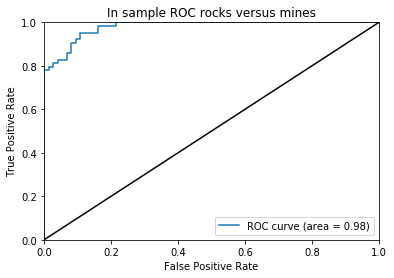

In [9]:
# Plot ROC curve

pl.clf()
pl.plot(false_positive_rate, true_positive_rate, label=f'ROC curve (area = {round(roc_auc, 2)})')
pl.plot([0, 1], [0, 1], 'k-')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC rocks versus mines')
pl.legend(loc='lower right')
pl.show()

In [10]:
# Generate ROC curve for out-of-sample data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

print(f'AUC for out-of-sample ROC curve: {roc_auc}')

AUC for out-of-sample ROC curve: 0.8484848484848485


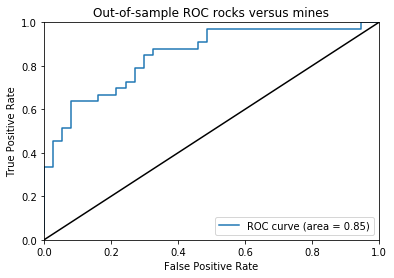

In [11]:
# Plot ROC curve

pl.clf()
pl.plot(false_positive_rate, true_positive_rate, label=f'ROC curve (area = {round(roc_auc, 2)})')
pl.plot([0, 1], [0, 1], 'k-')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Out-of-sample ROC rocks versus mines')
pl.legend(loc='lower right')
pl.show()